In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [267]:
# Load adults.data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adults_data = pd.read_csv('adult.data', names=columns, na_values=' ?', skipinitialspace=True)

# Load adult.test
adults_test = pd.read_csv('adult.test', names=columns, na_values=' ?', skipinitialspace=True, skiprows=1) 

adults_test.loc[:, 'income'] = adults_test['income'].replace(regex=True, to_replace=r'\.', value=r'')
# Combine both datasets
Data_set = pd.concat([adults_data, adults_test], ignore_index=True)
Data_set.reset_index(drop=True,inplace=True)
Data_set

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [268]:
print("Total rows in dataset before preprocessing : ", len(Data_set))

Total rows in dataset before preprocessing :  48842


In [269]:
# Counting the class labels
counting_class = Data_set['income'].value_counts()

# Display the class counts
print("Class Counts:")
print(counting_class)


Class Counts:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


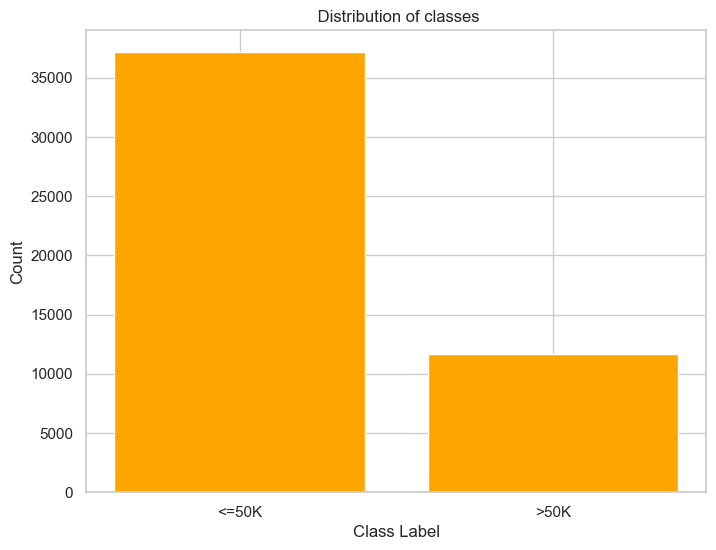

In [271]:
# Counting the class labels
count_class = Data_set['income'].value_counts()

# Visualizing class distribution
plt.figure(figsize=(8, 6))
plt.bar(count_class.index, count_class.values, color='orange')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title(' Distribution of classes')
plt.show()


### Find duplicates

In [272]:
Data_set.duplicated().values.any()

True

In [273]:
# Dropping the duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [274]:
print("Total in dataset after removing the Duplicates : ", len(Data_set_no_duplicates))

Total in dataset after removing the Duplicates :  48790


### Finding null values

In [275]:
# Finding rows containing '?'
null_values = Data_set_no_duplicates.isin(['?']).any(axis=1)

# Count the number of rows with '?'
no_null_values = null_values.sum()
print("Total rows containing '?' before dropping:", no_null_values)



Total rows containing '?' before dropping: 3615


### Dropping null values

In [276]:
# Dropping rows with '?'
null_df2 = Data_set_no_duplicates[~null_values]

# Resetting index after dropping
no_null_df2 = null_df2.dropna().reset_index(drop=True)

# Checking the number of rows after dropping
print("Total rows in dataset after dropping rows with '?':", len(no_null_df2))

no_null_df2

Total rows in dataset after dropping rows with '?': 45175


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45171,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45172,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45173,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Summary of the dataset

In [277]:
# Statistical summary of numerical features
print("Statistical numerical feature summary:")
(no_null_df2.describe())

Statistical numerical feature summary:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [278]:
# Summary of categorical features
print("Categorical features summary:")
(no_null_df2.describe(include=['object']))

Categorical features summary:


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


### Box plot for numerical features

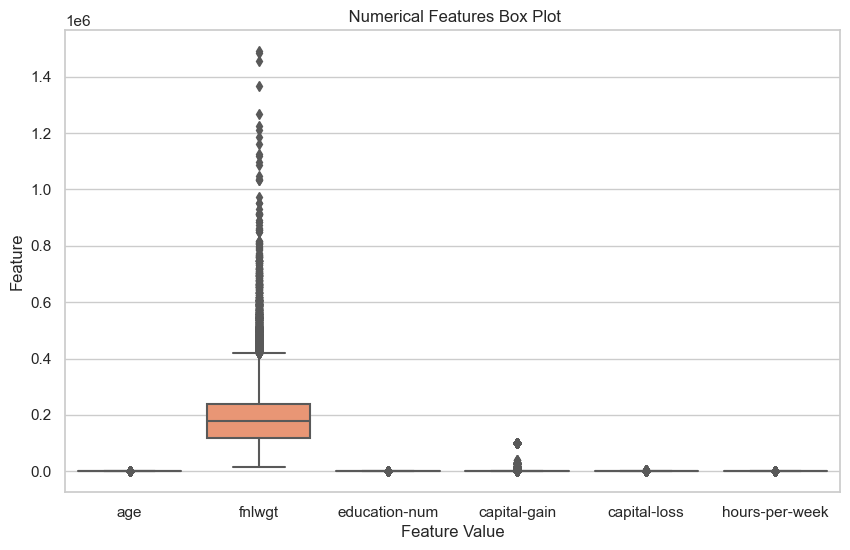

In [279]:
# Setting the style of the plots
sns.set(style="whitegrid")

# Ploting horizontal box plots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=no_null_df2, orient="v", palette="Set2")
plt.title(" Numerical Features Box Plot")
plt.ylabel("Feature")
plt.xlabel("Feature Value")
plt.show()


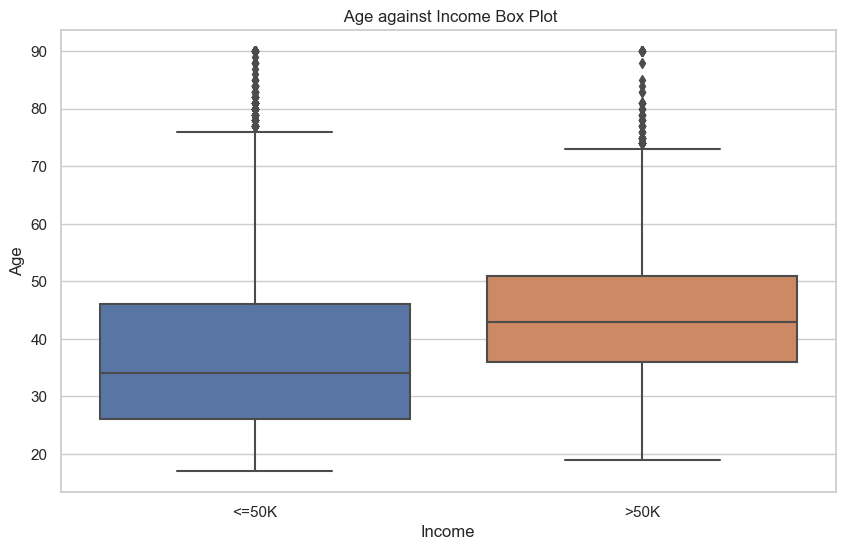

In [280]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=filtered_data)
plt.title(' Age against Income Box Plot')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


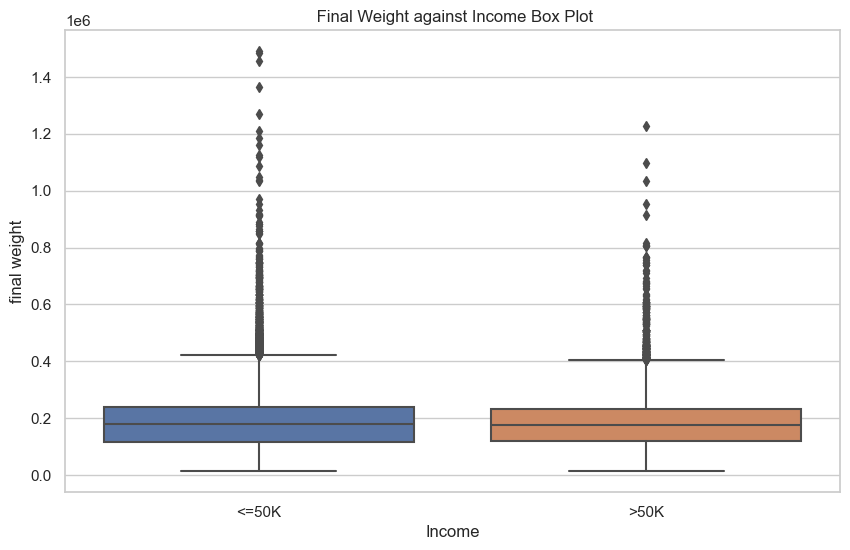

In [281]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='fnlwgt', data=filtered_data)
plt.title(' Final Weight against Income Box Plot')
plt.xlabel('Income')
plt.ylabel('final weight')
plt.show()


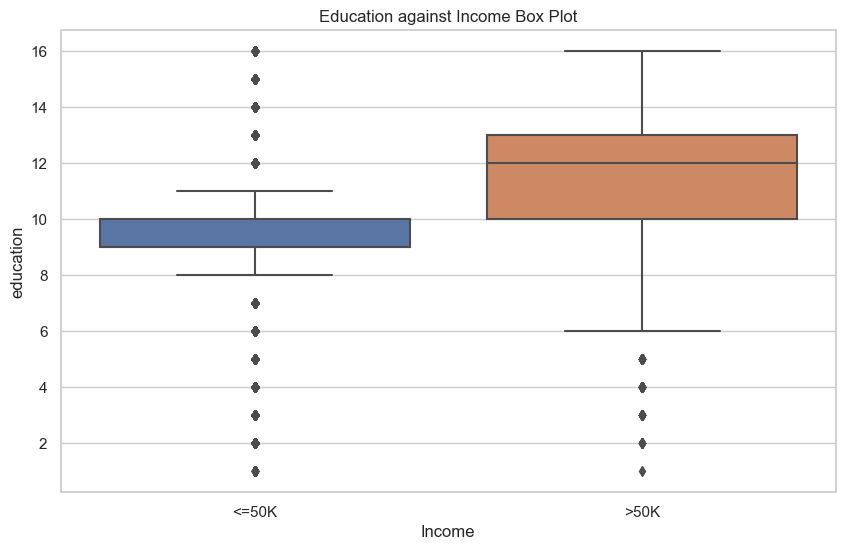

In [282]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=filtered_data)
plt.title('Education against Income Box Plot')
plt.xlabel('Income')
plt.ylabel('education')
plt.show()


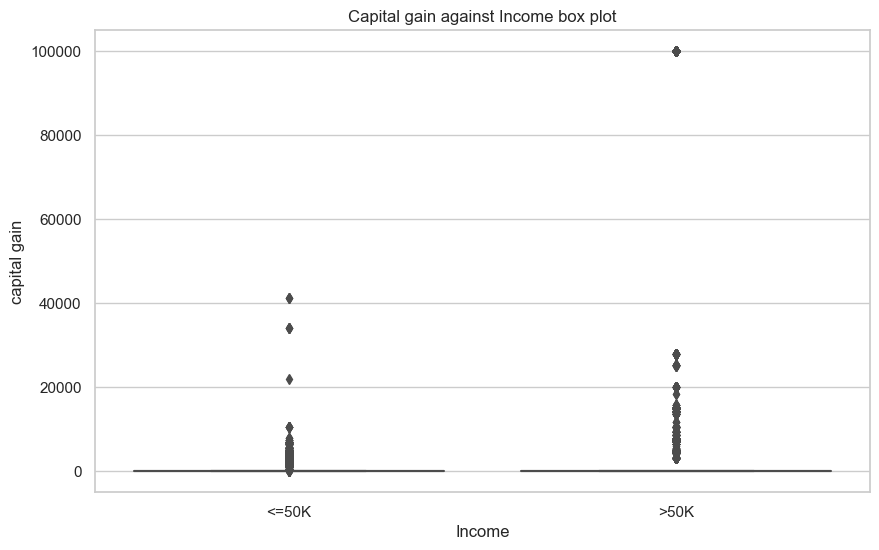

In [283]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-gain', data=filtered_data)
plt.title('Capital gain against Income box plot')
plt.xlabel('Income')
plt.ylabel('capital gain')
plt.show()


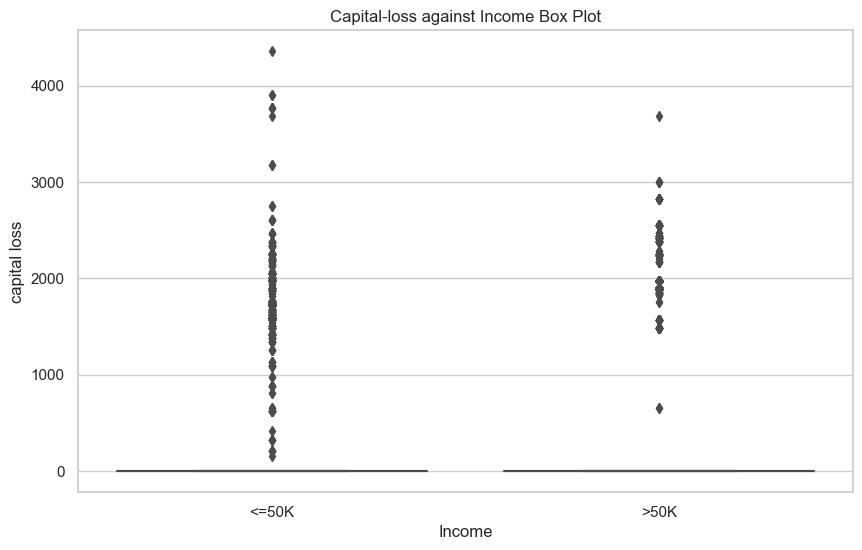

In [284]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-loss', data=filtered_data)
plt.title('Capital-loss against Income Box Plot')
plt.xlabel('Income')
plt.ylabel('capital loss')
plt.show()


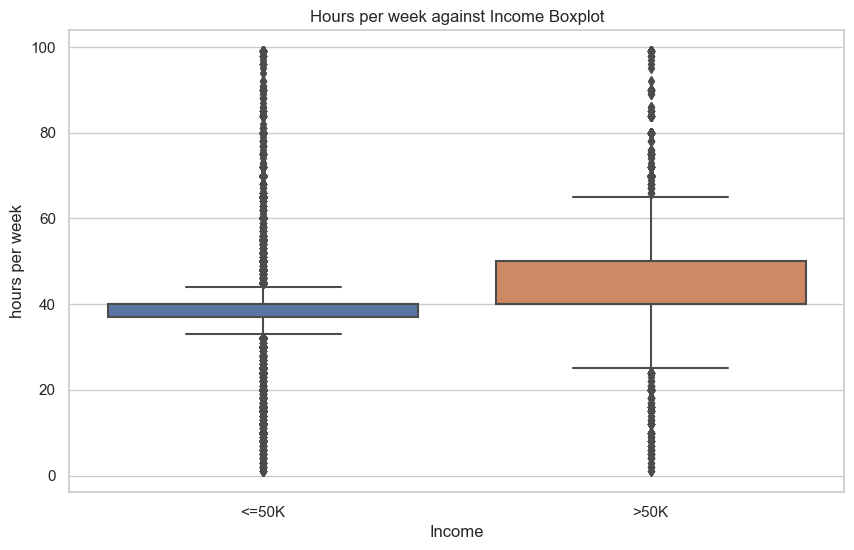

In [285]:
# Filtering the dataset based on income categories
income_category = ['<=50K', '>50K']
filtered_data = no_null_df2[no_null_df2['income'].isin(income_category)]

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=filtered_data)
plt.title('Hours per week against Income Boxplot')
plt.xlabel('Income')
plt.ylabel('hours per week')
plt.show()


### Bar plot for numerical features against income

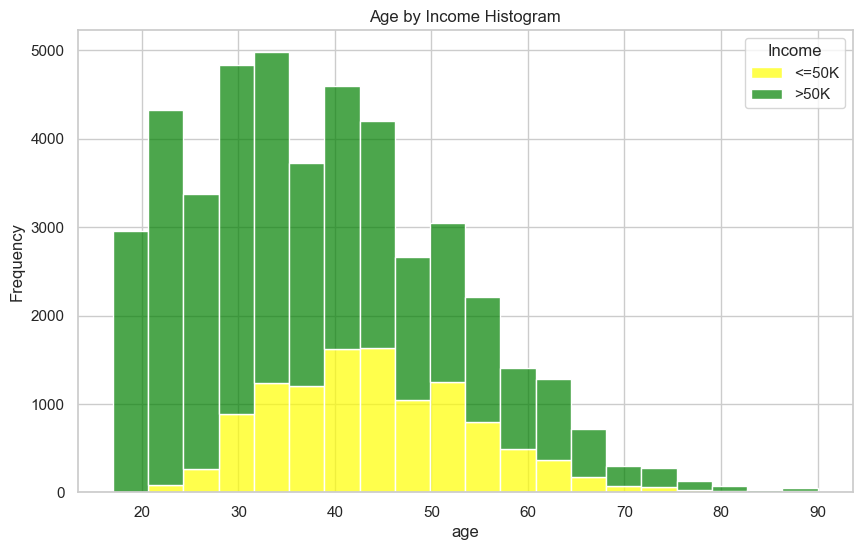

In [286]:
# Setting the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plotting histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='age', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Age by Income Histogram')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


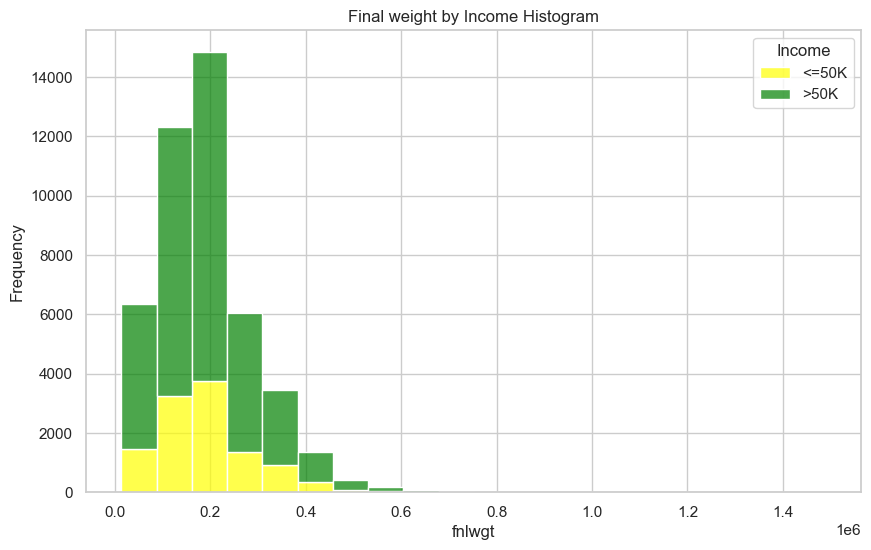

In [287]:
# Setting the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plotting histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='fnlwgt', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Final weight by Income Histogram')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


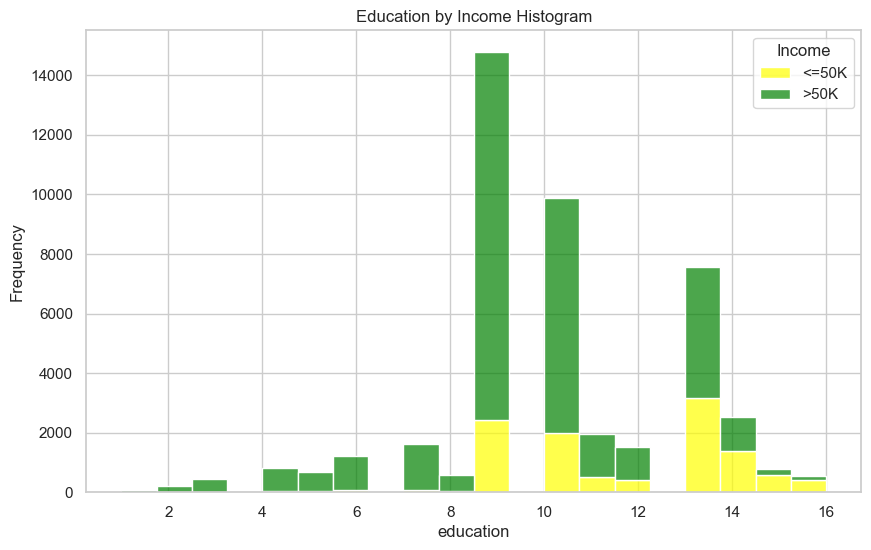

In [288]:
# Set the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plotting histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='education-num', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Education by Income Histogram')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


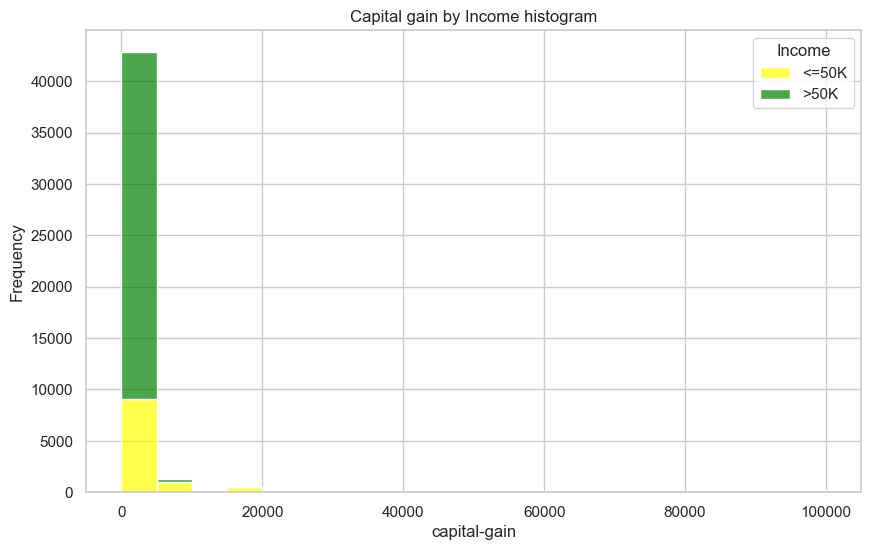

In [289]:
# Setting the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plotting histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='capital-gain', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Capital gain by Income histogram')
plt.xlabel('capital-gain')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


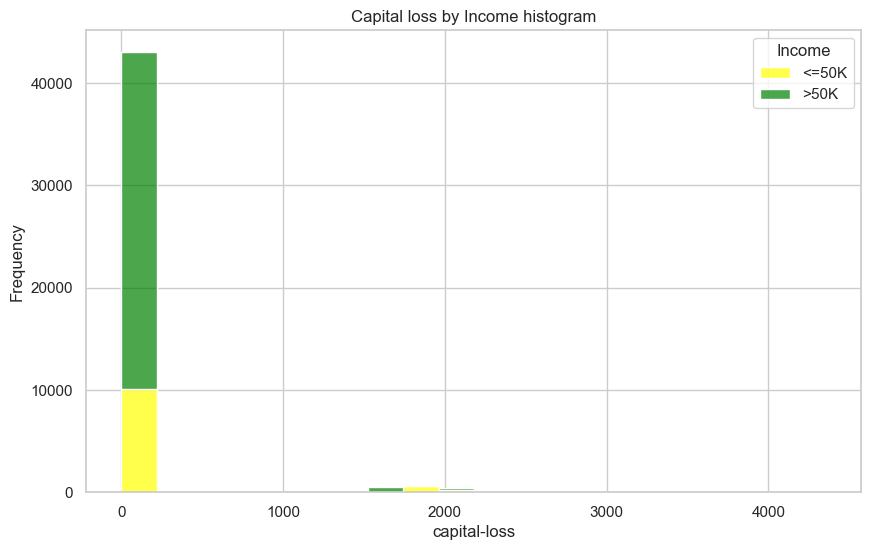

In [291]:
# Setting the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plotting histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='capital-loss', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Capital loss by Income histogram')
plt.xlabel('capital-loss')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


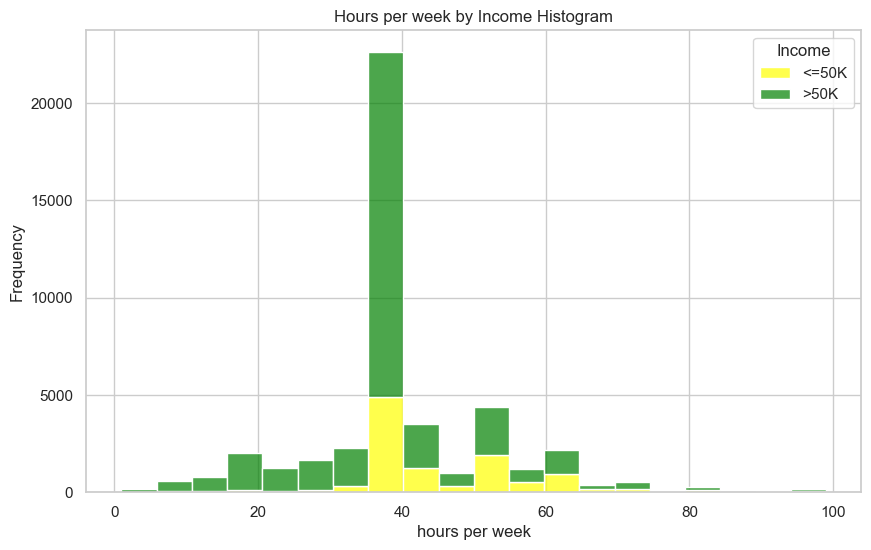

In [292]:
# Setting the style of the plots
sns.set(style="whitegrid")

under50K_color = 'green'
over50K_color = 'yellow'

# Plot histogram for 'Age' column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=no_null_df2, x='hours-per-week', hue='income', bins=20, palette={'>50K': over50K_color, '<=50K': under50K_color}, alpha=0.7, multiple='stack')
plt.title('Hours per week by Income Histogram' )
plt.xlabel('hours per week')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


### Standard deviation and mean before standard scalar

Standard Deviation of each numeric column:
age                   13.215349
fnlwgt            105652.436515
education-num          2.551740
capital-gain        7510.249876
capital-loss         405.156611
hours-per-week        12.007730
dtype: float64


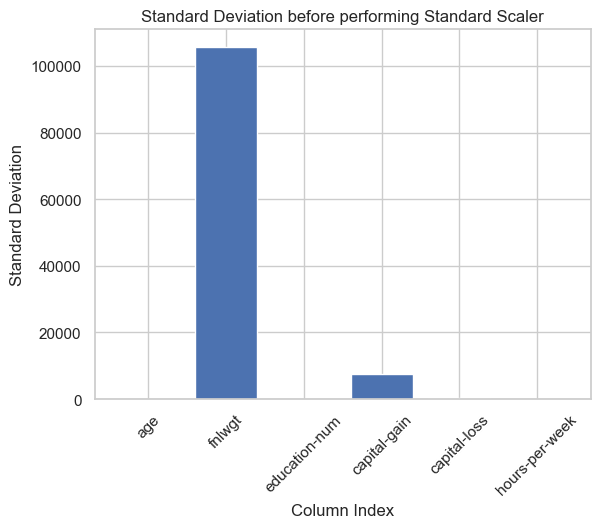

In [293]:
# Selecting only numeric columns
num_columns = no_null_df2.select_dtypes(include=['int64', 'float64'])

# Calculating the standard deviation of numeric columns
num_std = num_columns.std()

# Displaying the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(num_std)

plt.bar(range(len(num_std)), num_std)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.xticks(range(len(num_std)), num_columns.columns, rotation=45)
plt.show()


Mean of each numeric column:
age                   38.556170
fnlwgt            189738.798450
education-num         10.119314
capital-gain        1102.576270
capital-loss          88.687593
hours-per-week        40.942512
dtype: float64


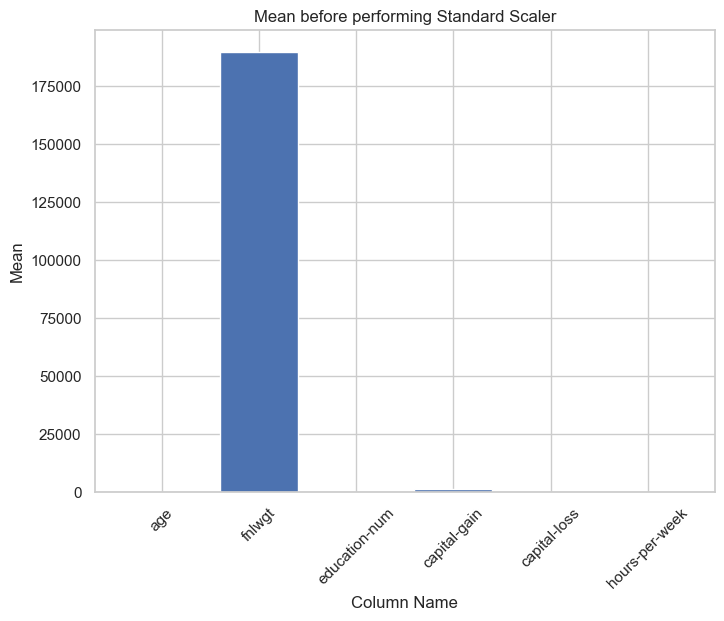

In [294]:
# Calculating the mean of numeric columns
mean_values = num_columns.mean()

# Displaying the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plotting the mean of all columns
plt.figure(figsize=(8, 6))
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Name")
plt.ylabel("Mean")

plt.xticks(range(len(mean_values)), num_columns.columns, rotation=45)

plt.show()

In [295]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fiting and transform ingthe numeric columns using StandardScaler
scaled_data = scaler.fit_transform(no_null_df2.select_dtypes(include=['int64', 'float64']))

# Creating a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=no_null_df2.select_dtypes(include=['int64', 'float64']).columns)

# Resetting index of df2
no_null_df2.reset_index(drop=True, inplace=True)

# Concatenating the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, no_null_df2.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)], axis=1)

print("Dataset after standard scaling:")
(final_scaled_data)


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,-0.420438,0.525050,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
45171,0.033585,0.243066,1.128923,-0.146811,-0.218899,-0.411615,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
45172,-0.042086,1.753355,1.128923,-0.146811,-0.218899,0.754313,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
45173,0.411937,-1.001860,1.128923,0.579538,-0.218899,-0.078493,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


### Mean and standard deviation after standard scalar

In [296]:
# Selecting numerical columns to calculate mean and standard deviation
num_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate mean and standard deviation of each feature in the scaled numerical columns
mean_values = scaled_df[num_col].mean()
std_values = scaled_df[num_col].std()

# Display mean and standard deviation of each feature
print("Mean values of each feature after standard scaling:")
print(mean_values)
print("\nStandard deviation of each feature after standard scaling:")
print(std_values)


Mean values of each feature after standard scaling:
age               1.509952e-17
fnlwgt           -1.410862e-16
education-num    -2.878347e-17
capital-gain     -5.347748e-18
capital-loss      1.132464e-17
hours-per-week   -9.201273e-17
dtype: float64

Standard deviation of each feature after standard scaling:
age               1.000011
fnlwgt            1.000011
education-num     1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
dtype: float64


### Mean after standard scalar

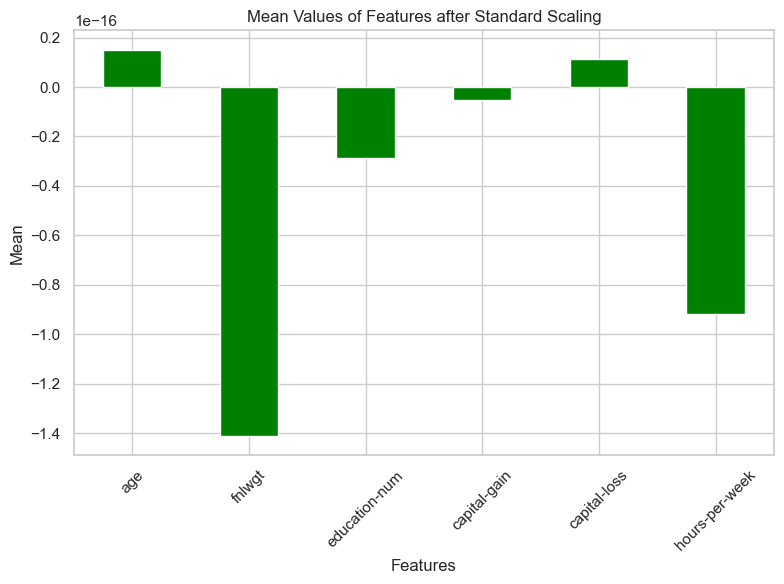

In [297]:
# Plotting mean values
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color='green')
plt.title('Mean Values of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Standard deviation after standard scalar

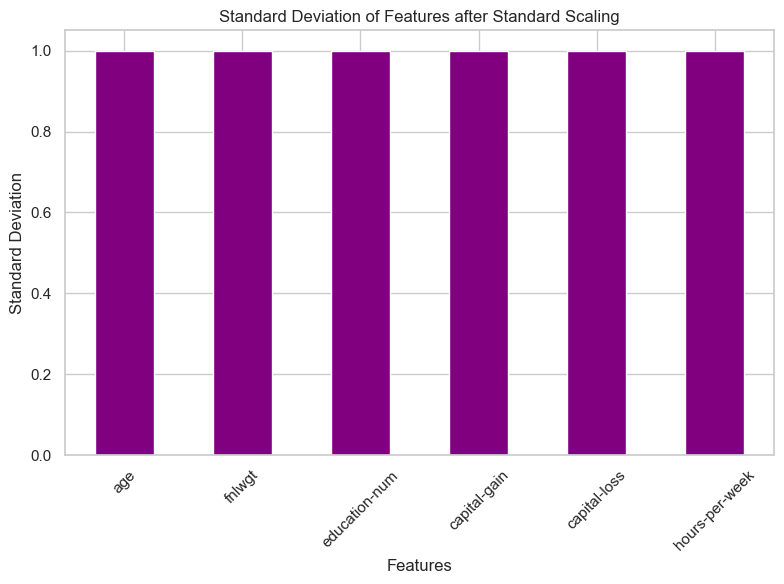

In [298]:
# Plotting standard deviation values
plt.figure(figsize=(8, 6))
std_values.plot(kind='bar', color='purple')
plt.title('Standard Deviation of Features after Standard Scaling')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation matrix

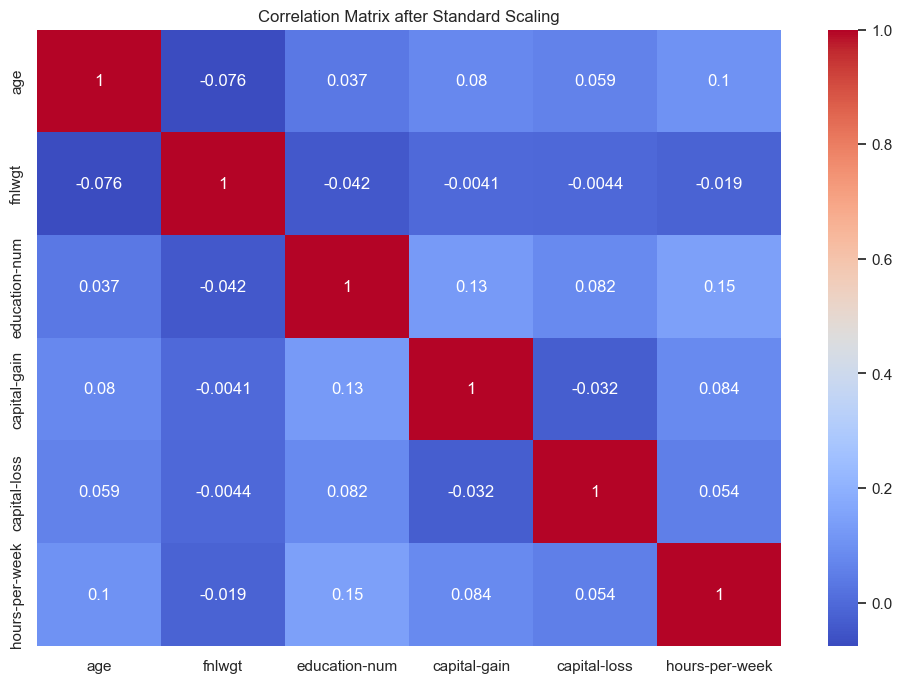

In [299]:
# Selecting only numeric columns
nume_columns = final_scaled_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = num_columns.corr(method='pearson')

# Display correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix after Standard Scaling")
plt.show()


### Encoding categorical features

# Building predictive model using Random Forest

### Split into train and test and fitting the classifier

In [300]:
# Identifying the features (X) and target variable (y)
X = final_scaled_data.drop('income', axis=1)
y = final_scaled_data['income']

# One-hot encode categorical features
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)

# Concatenating one-hot encoded features with the numeric features
X_encoded = pd.concat([X.drop(categorical_columns, axis=1), X_categorical], axis=1)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Defining the pipeline
pipeline = Pipeline([
    ('sampling', SMOTEENN(random_state=42)),  # Over- and undersampling
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))  # Classifier
])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Displaying the shapes of the training and testing sets
print(" X_train shape:", X_train.shape)
print(" X_test shape:", X_test.shape)
print(" y_train shape:", y_train.shape)
print(" y_test shape:", y_test.shape)


 X_train shape: (36140, 96)
 X_test shape: (9035, 96)
 y_train shape: (36140,)
 y_test shape: (9035,)


In [301]:
# Evaluating the pipeline on the training set
train_accuracy = pipeline.score(X_train, y_train)

# Formatting the accuracy to two decimal places and as a percentage
formatted_train_accuracy = "{:.2f}%".format(train_accuracy * 100)

print("Training Set Accuracy:", formatted_train_accuracy)


Training Set Accuracy: 85.04%


In [302]:
# Evaluating the pipeline on the test set
test_accuracy = pipeline.score(X_test, y_test)

# Formatting the accuracy as a percentage with two decimal places
formatted_test_accuracy = "{:.2f}%".format(test_accuracy * 100)

print("Test Set Accuracy:", formatted_test_accuracy)


Test Set Accuracy: 80.86%


### Plotting the ROC Curve

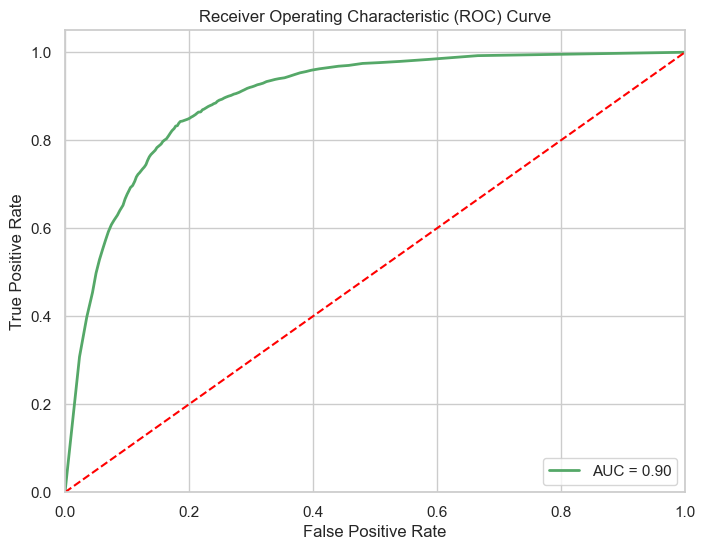

In [303]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  

y_test_probabilities = pipeline.predict_proba(X_test)[:, 1]

# Encode target variable into binary format
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_probabilities)

# Calculating the area under the ROC curve (AUC)
auc = roc_auc_score(y_test_binary, y_test_probabilities)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Classification report

In [304]:
# Making predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Generating the classification report
classification_rep = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      6830
        >50K       0.57      0.85      0.69      2205

    accuracy                           0.81      9035
   macro avg       0.76      0.82      0.77      9035
weighted avg       0.85      0.81      0.82      9035



### Confusion Matrix

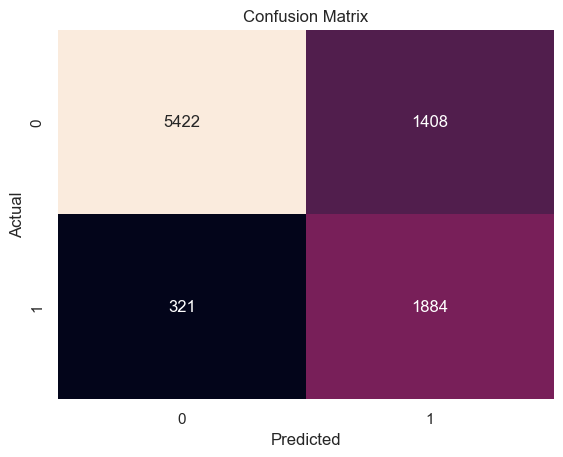

In [305]:
# Calculate the confusion matrix on the test set
confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Building predictive modle using Naive Bayes


Split into train and test

In [306]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Encoding the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Applying SMOTEENN for combined over- and under-sampling
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train_encoded)

# Display the shapes of the training and testing sets
print(" X_train shape:", X_train_resampled.shape)
print(" X_test shape:", X_test.shape)
print(" y_train shape:", y_train_resampled.shape)
print(" y_test shape:", y_test.shape)


 X_train shape: (40381, 96)
 X_test shape: (9035, 96)
 y_train shape: (40381,)
 y_test shape: (9035,)


Fit the classifier into the traing set

In [307]:
from sklearn.naive_bayes import GaussianNB

# Initializing the Gaussian Naïve Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training set
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [309]:
y_test_pred = naive_bayes_classifier.predict(X_test)

# Converting integer labels in y_test_pred to string labels

y_test_pred_str = label_encoder.inverse_transform(y_test_pred)

Classification Report

In [310]:
classification_rep = classification_report(y_test, y_test_pred_str)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.96      0.56      0.71      6830
        >50K       0.41      0.93      0.57      2205

    accuracy                           0.65      9035
   macro avg       0.69      0.75      0.64      9035
weighted avg       0.83      0.65      0.68      9035



Test Set Accuracy

In [312]:
# Making predictions on the test set
y_test_pred = naive_bayes_classifier.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_test_pred_str)
accuracy_percentage = "{:.2f}".format(accuracy * 100)

print("Test set Accuracy:", accuracy_percentage, "%")

Test set Accuracy: 65.28 %


In [313]:
# Making predictions on the training set
y_train_pred = naive_bayes_classifier.predict(X_train_resampled)

# Calculating accuracy score for the training set
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)

accuracy_train_percentage = "{:.2f}".format(accuracy_train * 100)

print("Training Set Accuracy:", accuracy_train_percentage, "%")

Training Set Accuracy: 83.90 %


Confusion Matrix

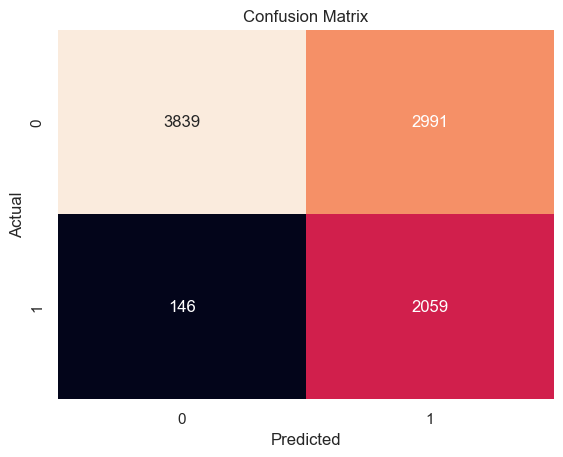

In [315]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_test_pred_str)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
